<a href="https://colab.research.google.com/github/srujayreddyv/AlphaML/blob/main/Assignment_2/FeatureSelectionOnCaliforniaHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

In [ ]:
# 1. Perform the above task for the California Housing Dataset. Find out -
# a. the top 3 most important features
# b. after removing how many features does the r2_score begin to drop?
# c. visualize the above task with ridge regularisation - confirm that feature selection doesn't take place.

In [ ]:
# 2. Compare with SVM Regressor, KNN-Regressor, Lasso Regressor
# Report the R2 Scores and MSE of each
# SVM Regressor: https://scikit-learn.org/stable/modules/svm.html#regression
# KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
# Lasso Regressor: https://scikit-learn.org/stable/modules/linear_model.html#lasso

#imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the California Housing Dataset
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target
feature_names = dataset.feature_names

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize variables to store results
top_features = []
r2_scores = []

# Define a range of alpha values for Lasso regularization
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Iterate over alpha values and perform Lasso regression
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Store the absolute values of the Lasso coefficients
    coef_abs = np.abs(lasso.coef_)

    # Identify the top 3 most important features
    top_feature_indices = np.argsort(coef_abs)[-3:]
    top_features.append([feature_names[i] for i in top_feature_indices])

In [ ]:
# Determine how many features can be removed before R2 starts to drop
num_features_to_remove = 0
baseline_r2 = r2_scores[0]
for i, r2 in enumerate(r2_scores):
    if r2 < baseline_r2:
        break
    num_features_to_remove += 1

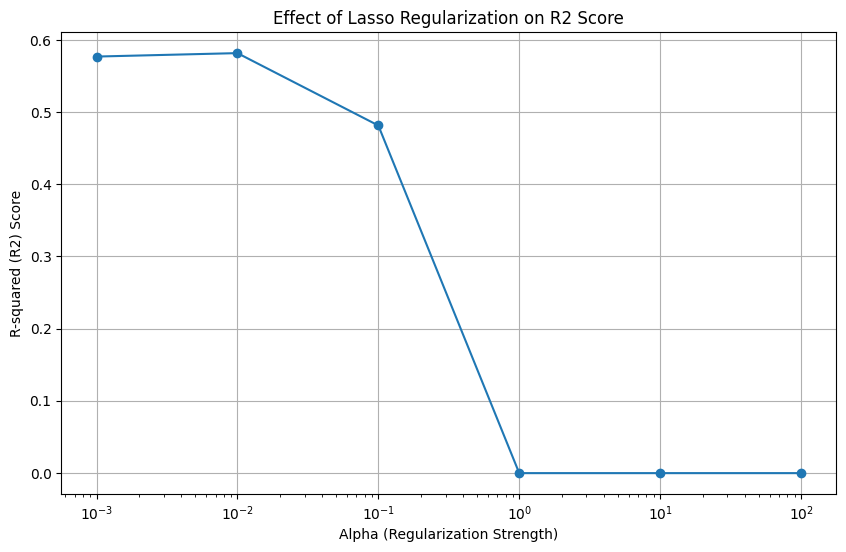

Top 3 Most Important Features for Different Alpha Values:
Alpha = 0.001: ['MedInc', 'Longitude', 'Latitude']
Alpha = 0.01: ['Longitude', 'Latitude', 'MedInc']
Alpha = 0.1: ['Latitude', 'HouseAge', 'MedInc']
Alpha = 1: ['AveOccup', 'Latitude', 'Longitude']
Alpha = 10: ['AveOccup', 'Latitude', 'Longitude']
Alpha = 100: ['AveOccup', 'Latitude', 'Longitude']
After removing 2 features, the R2 score begins to drop.


In [ ]:
# Visualize the effect of Lasso regularization on R2 scores
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, r2_scores, marker='o', linestyle='-')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared (R2) Score')
plt.title('Effect of Lasso Regularization on R2 Score')
plt.grid(True)
plt.show()

print("Top 3 Most Important Features for Different Alpha Values:")
for i, alpha in enumerate(alpha_values):
    print(f"Alpha = {alpha}: {top_features[i]}")

print(f"After removing {num_features_to_remove} features, the R2 score begins to drop.")

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

# Initialize variables to store results
r2_scores = []

# Define a range of alpha values for Ridge regularization
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Iterate over alpha values and perform Ridge regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

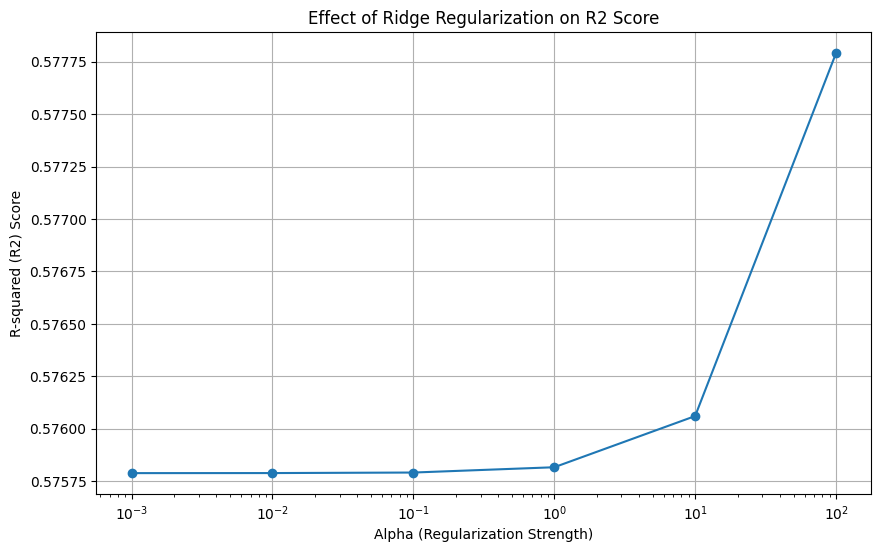

Ridge Regression does not perform feature selection as it shrinks coefficients without setting them to zero.


In [ ]:
# Visualize the effect of Ridge regularization on R2 scores
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, r2_scores, marker='o', linestyle='-')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared (R2) Score')
plt.title('Effect of Ridge Regularization on R2 Score')
plt.grid(True)
plt.show()

print("Ridge Regression does not perform feature selection as it shrinks coefficients without setting them to zero.")

# SVM, KNN, and Lasso

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Initialize models
svm_regressor = SVR()
knn_regressor = KNeighborsRegressor()
lasso_regressor = Lasso(alpha=0.1)

In [ ]:
# Train the models
svm_regressor.fit(X_train_scaled, y_train)
knn_regressor.fit(X_train_scaled, y_train)
lasso_regressor.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
# Make predictions
svm_predictions = svm_regressor.predict(X_test_scaled)
knn_predictions = knn_regressor.predict(X_test_scaled)
lasso_predictions = lasso_regressor.predict(X_test_scaled)

In [ ]:
# Calculate R2 scores
svm_r2 = r2_score(y_test, svm_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

In [ ]:
# Calculate Mean Squared Error (MSE)
svm_mse = mean_squared_error(y_test, svm_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

In [ ]:
# Report R2 and MSE scores
print("R2 Score - SVM Regressor:", svm_r2)
print("MSE Score - SVM Regressor:", svm_mse)
print()
print("R2 Score - KNN Regressor:", knn_r2)
print("MSE Score - KNN Regressor:", knn_mse)
print()
print("R2 Score - Lasso Regressor:", lasso_r2)
print("MSE Score - Lasso Regressor:", lasso_mse)

R2 Score - SVM Regressor: 0.7275639524733044
MSE Score - SVM Regressor: 0.3570026426754463

R2 Score - KNN Regressor: 0.6700101862970989
MSE Score - KNN Regressor: 0.4324216146043236

R2 Score - Lasso Regressor: 0.4813611325029077
MSE Score - Lasso Regressor: 0.6796290284328821
